# Ryhmätehtävä 1

## 1. Tavoiteet

Tämän työn aikana halutaan saada vastauksia seuraaviin kysymyksiin:

1. Miksi siirto-oppiminen auttaa?

2. Miten data-augmentaatio vaikuttaa tuloksiin?

3. Mitkä olivat suurimmat haasteet?

4. Mitä kokeilisit seuraavaksi parantaaksesi suorituskykyä?

## 2. Datan ymmärtäminen

Tässä meillä on kuvadatasetti, jota käytetään neuroverkon kouluttamiseen. Kokonaismäärä kuvia on 25 tuhatta, sisältäen 12,5 tuhatta kuvaa kissoista ja 12,5 tuhatta kuvaa koirista. Koulutukseen käytettävät kuvat on nimetty seuraavan kaavan mukaisesti: 'luokan nimi'.'kuvan numero'.jpg. Testauksessa käytettävät kuvat on nimetty kaavan 'kuvan numero'.jpg mukaan.

## 3. Datan esikäsittely

In [ ]:
#Ladataan kaikki projektissa tarvittavat kirjastot
import os, shutil, pathlib
import matplotlib.pyplot as plt

In [ ]:
#Määritellään polut projektirakenteen rakentamista varten.
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [8]:
def make_subset(subset_name, start_index, end_index):
     for category in ("cat", "dog"): 
        dir = new_base_dir / subset_name / category 
        os.makedirs(dir) 
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)] 
        for fname in fnames: shutil.copyfile(src=original_dir / fname, dst=dir / fname)

In [9]:
#make_subset("train", start_index=0, end_index=1000)
#make_subset("validation", start_index=1000, end_index=1500)
#make_subset("test", start_index=1500, end_index=2500)

Tietokokonaisuuden jakamisen jälkeen tuloksena pitäisi olla seuraava hakemistorakenne:

 ![Projektin rakenne](structure.png)

Tarkistetaan yksi esimerkkikuva kustakin osiosta:

Test (cat):
 - ![Test_cat](cats_vs_dogs_small/test/cat/cat.1500.jpg)

Test (dog):
 - ![Test_dog](cats_vs_dogs_small/test/dog/dog.1500.jpg)

Train (cat):
 - ![Test_cat](cats_vs_dogs_small/train/cat/cat.0.jpg)

Train (dog):
 - ![Test_dog](cats_vs_dogs_small/train/dog/dog.0.jpg)

Validation (cat):
 - ![Test_cat](cats_vs_dogs_small/validation/cat/cat.1000.jpg)

Validation (dog):
 - ![Test_dog](cats_vs_dogs_small/validation/dog/dog.1000.jpg)

## 4. Mallin rakentaminen

### 4.1 CNN- mallin rakentaminen

In [ ]:
# Rakenetaan perus malli
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Määrittelemme tavan laskea virheet, tavan päivittää mallin painot virheiden pienentämiseksi ja tavan seurata mallin tarkkuutta 
# jokaisen harjoitusjakson jälkeen.
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
# Luodaan datajoukot harjoittelua, validointia ja testausta varten käyttämällä Kerasin `image_dataset_from_directory`-funktiota,
# joka auttaa lataamaan kuvia hakemistoista ja valmistelemaan ne käytettäväksi syväoppimisputkessa

train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# Luodaan TensorFlow-tietokokonaisuus satunnaisluvuista käyttämällä NumPy-kirjastoa datan tuottamiseen ja TensorFlow:ta 
# tietokokonaisuuden luomiseen.
import numpy as np 
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
# Asennetaan takaisinsoitto ja koulutetaan malli
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.5344 - loss: 0.7083 - val_accuracy: 0.5170 - val_loss: 0.6918
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.5289 - loss: 0.6934 - val_accuracy: 0.5010 - val_loss: 0.8616
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 354ms/step - accuracy: 0.5556 - loss: 0.6921 - val_accuracy: 0.6290 - val_loss: 0.6362
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.6239 - loss: 0.6473 - val_accuracy: 0.6720 - val_loss: 0.6142
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - accuracy: 0.6797 - loss: 0.6122 - val_accuracy: 0.6640 - val_loss: 0.6186
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.7147 - loss: 0.5865 - val_accuracy: 0.6410 - val_loss: 0.6501
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.7364 - loss: 0.5404 - val_accuracy: 0.7130 - val_loss: 0.5943
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 374ms/step - accuracy: 0.7528 - loss: 0.4935 - val_accu

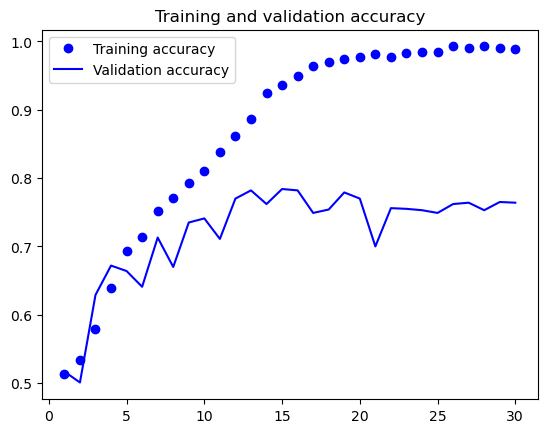

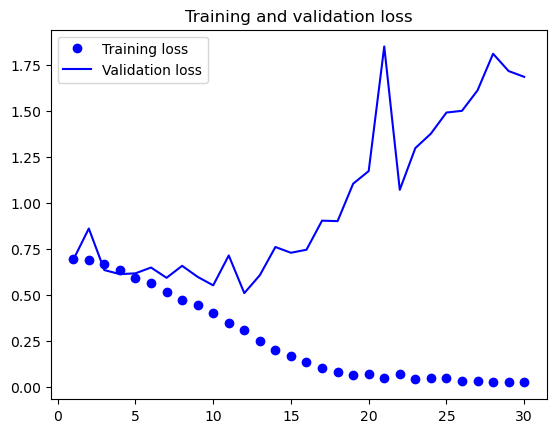

In [ ]:
# Visualisoidaan koulutus- ja validointitulokset
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Kuvaajat osoittavat ylikunnon vaikutuksen:
- Harjoitusdatan tarkkuus kasvaa ja lähestyy 100 prosenttia, kun taas tappiot lähestyvät nollaa noin 18 epookin jälkeen ja pysyvät samalla tasolla. 
- Tarkkuus todentamisdatassa pysähtyy 70-75 prosenttiin. Validointivaiheen tappiot ovat pienimmillään noin 8 epookin jälkeen ja kasvavat sen jälkeen.

On selvää, että tämän mallin ylikoulutus on havaittu. Syynä ylikouluttamiseen on se, että mallin kouluttamiseen ei ole riittävästi näytteitä. Yksi tapa estää mallin ylikouluttaminen on tarjota lisää dataa koulutusta varten.  Tämä voidaan tehdä esimerkiksi lisäämällä mallin alkuun useita datan rikastamiskerroksia.

In [ ]:
# Testataan malli
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.7441 - loss: 0.5484
Test accuracy: 0.740


74 %:n tarkkuus ja 55 %:n tappio on melko alhainen tulos.

Katsotaanpa joitakin esimerkkejä epäonnistuneista ennusteista:

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step


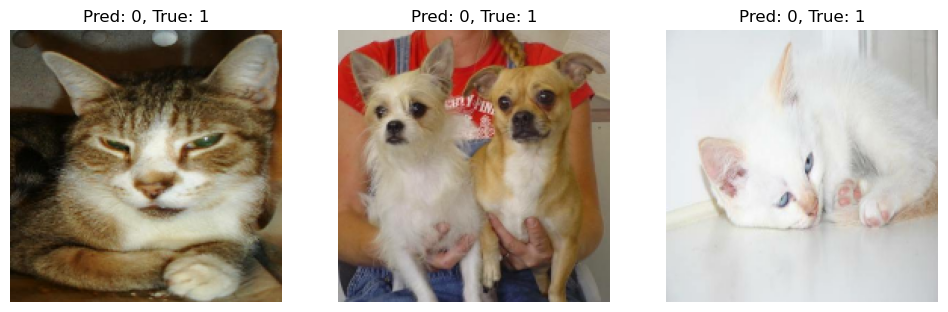

In [ ]:
# Mallin ennusteiden saaminen
test_model = keras.models.load_model("convnet_from_scratch.keras")
predictions = test_model.predict(test_dataset)
predicted_labels = np.argmax(predictions, axis=1)

# Todellisten merkkien saaminen
true_labels = np.concatenate([y for _, y in test_dataset], axis=0)

# Virheellisten ennusteiden indeksien löytäminen
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Päättelemme 3 ensimmäistä virheellistä ennustetta
def plot_incorrect_predictions(test_dataset, incorrect_indices, predicted_labels, true_labels):
    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(incorrect_indices[:3]): 
        ax = plt.subplot(3, 3, i + 1)
        # Kuvien poimiminen testiaineistosta
        image, _ = next(iter(test_dataset.unbatch().skip(idx).take(1)))
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(f"Pred: {predicted_labels[idx]}, True: {true_labels[idx]}")
        plt.axis("off")

plot_incorrect_predictions(test_dataset, incorrect_indices, predicted_labels, true_labels)
plt.show()

### 4.2 Mallin rakentaminen VGG16-n perustella ilman  augmentaatiota

Luodaan 2 mallin instanssia, jotka perustuvat VGG16:een. Toisessa niistä on jäädytetyt parametrit. Kun molempien mallien tuloksia on vertailtu

Keras API:n avulla esivalmennetun VGG16-neuraaliverkon perusarkkitehtuuri. Tässä lähestymistavassa sovelletaan siirto-oppimista, jossa jo koulutettua mallia käytetään uuden tehtävän pohjana.

In [ ]:
# Jäädyttämättä parametreja
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


In [ ]:
# Parametrien jäädyttämisellä
conv_base_frozen = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))
conv_base.trainable = False

In [29]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Valmistellaan mallin syöttötiedot

In [30]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

def get_features_and_labels_frozen(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base_frozen.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [31]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

train_features_frozen, train_labels_frozen = get_features_and_labels_frozen(train_dataset)
val_features_frozen, val_labels_frozen = get_features_and_labels_frozen(validation_dataset)
test_features_frozen, test_labels_frozen = get_features_and_labels_frozen(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [32]:
train_features.shape, train_features_frozen.shape

((2000, 5, 5, 512), (2000, 5, 5, 512))

In [ ]:
# Mallin luominen ja parametrien säätäminen
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
            optimizer="rmsprop",
            metrics=["accuracy"])

In [ ]:
# Takaisinsoiton määrittäminen ja mallin kouluttaminen ilman parametrien jäädyttämistä
callbacks = [ keras.callbacks.ModelCheckpoint( filepath="feature_extraction.keras", 
                                              save_best_only=True, 
                                              monitor="val_loss")]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8702 - loss: 37.4641 - val_accuracy: 0.9420 - val_loss: 8.2808
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9697 - loss: 3.4579 - val_accuracy: 0.9700 - val_loss: 4.8625
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9803 - loss: 2.9819 - val_accuracy: 0.9670 - val_loss: 4.7508
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9839 - loss: 2.0832 - val_accuracy: 0.9680 - val_loss: 5.9301
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9986 - loss: 0.2691 - val_accuracy: 0.9790 - val_loss: 3.6991
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9955 - loss: 0.6527 - val_accuracy: 0.9710 - val_loss: 5.3692
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9963 - loss: 0.2602 - val_accuracy: 0.9640 - val_loss: 6.5884
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9973 - loss: 0.3916 - val_accuracy: 0.9690 - 

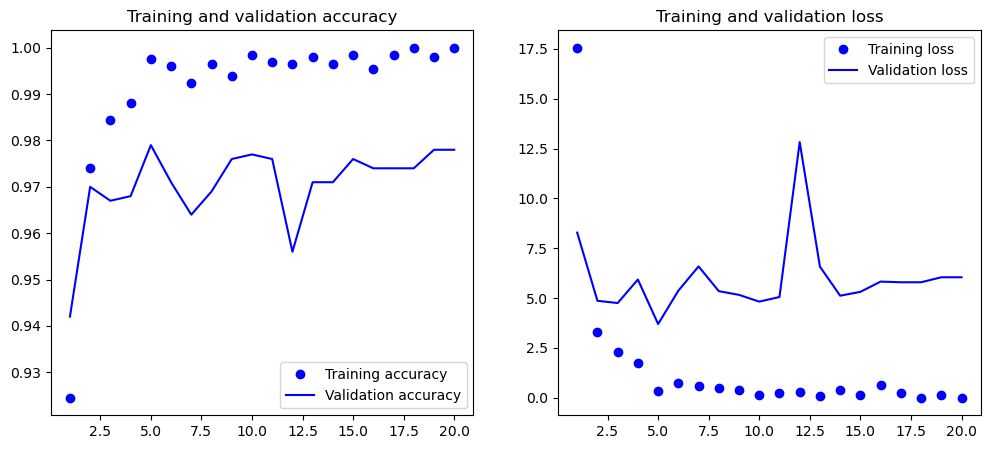

In [ ]:
# Visualisoidaan koulutus- ja validointitulokset
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(epochs, accuracy, "bo", label="Training accuracy")
axes[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
axes[0].set_title("Training and validation accuracy")
axes[0].legend()


axes[1].plot(epochs, loss, "bo", label="Training loss")
axes[1].plot(epochs, val_loss, "b", label="Validation loss")
axes[1].set_title("Training and validation loss")
axes[1].legend()

plt.show()

In [ ]:
# Takaisinsoiton määrittäminen ja mallin kouluttaminen parametrien jäädyttämisellä
callbacks = [ keras.callbacks.ModelCheckpoint( filepath="feature_extraction_frozen.keras", 
                                              save_best_only=True, 
                                              monitor="val_loss")]
history = model.fit(
    train_features_frozen, train_labels_frozen,
    epochs=20,
    validation_data=(val_features_frozen, val_labels_frozen),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9993 - loss: 0.0669 - val_accuracy: 0.9720 - val_loss: 7.1318
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9991 - loss: 0.0216 - val_accuracy: 0.9780 - val_loss: 6.1035
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.9780 - val_loss: 5.8424
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 5.1934e-18 - val_accuracy: 0.9780 - val_loss: 5.8424
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 1.4497e-14 - val_accuracy: 0.9780 - val_loss: 5.8424
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 3.6539e-08 - val_accuracy: 0.9770 - val_loss: 5.7936
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9770 - val_loss: 5.7936
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 7.4665e-37 - val_

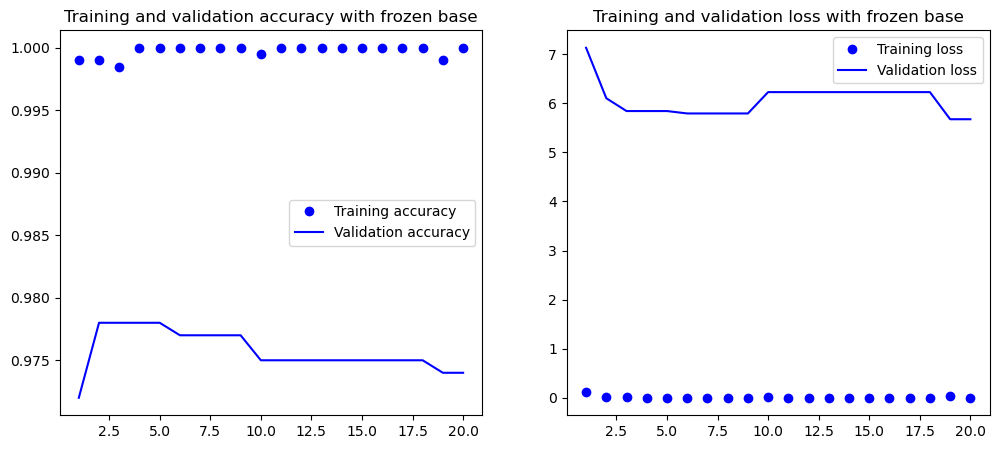

In [ ]:
# Visualisoidaan koulutus- ja validointitulokset
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(epochs, accuracy, "bo", label="Training accuracy")
axes[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
axes[0].set_title("Training and validation accuracy with frozen base")
axes[0].legend()


axes[1].plot(epochs, loss, "bo", label="Training loss")
axes[1].plot(epochs, val_loss, "b", label="Validation loss")
axes[1].set_title("Training and validation loss with frozen base")
axes[1].legend()

plt.show()

### CNN:n ja VGG16:n vertailu:

- **Ylioppiminen**: Molemmat mallit kärsivät ylioppimisesta, mutta tavallisessa CNN:ssä se on selvempää, mikä näkyy voimakkaampina värähtelyinä validointitarkkuudessa ja -tappiossa.
- **Yleistettävyys**: VGG16, erityisesti jähmetetyllä rungolla, osoittaa vakaampia yleistämistuloksia (vähemmän värähtelyjä).
- **Alkutarkkuus**: CNN saavuttaa nopeasti korkean tarkkuuden, mutta sen pitäminen vakaana validoinnin aikana on vähemmän vakaa.

### Johtopäätökset:
- Tavallinen CNN saattaa olla liian herkkä harjoitusdatalle, joten sen yleistämiskykyä täytyy parantaa.
- Ennakkokoulutetun VGG16-mallin käyttö tarjoaa etuja tehtävissä, jotka vaativat kestävämpiä tuloksia.

### 4.3 Mallin rakentaminen VGG16-n perustella augmentaation kanssa

Tarkastellaan piirteiden eristämismenetelmää, joka mahdollistaa tietojen rikastamisen käytön oppimisprosessissa. Yhdistetään mallit conv_base ja uusi tiheä luokittelija, ja suoritetaan sen täydellinen koulutus.

Tätä varten jähmetämme konvoluutioalustan. Yhden tai useamman kerroksen jähmettäminen estää niiden painokertoimien muuttumisen oppimisprosessin aikana. Jos näin ei tehdä, konvoluutioalustan aiemmin oppimat esitykset voivat muuttua uuden datan oppimisen aikana. Koska Dense-kerrokset alustetaan satunnaisilla arvoilla, verkossa voi tapahtua huomattavia painojen muutoksia, mikä voi käytännössä tuhota aiemmin saadut esitykset.

In [ ]:
# Luodaan esivalmennettu malli ja jäädydetään parametrit
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [39]:
print("This is the number of trainable weights "
"after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


Toteutetaan 3 augmentaatiotekniikkaa: RandomFlip, RandomRotation, RandomZoom

In [40]:
data_augmentation = keras.Sequential( 
    [ layers.RandomFlip("horizontal"), 
      layers.RandomRotation(0.5), 
      layers.RandomZoom(0.5), ])

Näytetään esimerkkejä augmentoiduista kuvista

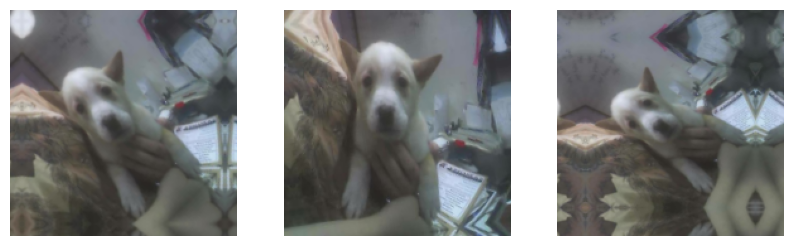

In [41]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(3):  # 9, чтобы заполнить 3x3 сетку
        augmented_images = data_augmentation(tf.expand_dims(images[0], 0))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

plt.show()

In [ ]:
# Mallin luominen ja säätäminen
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy", 
              optimizer="rmsprop", 
              metrics=["accuracy"])

In [ ]:
# Takaisinsoiton määrittäminen ja mallin kouluttaminen
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.7148 - loss: 65.2191 - val_accuracy: 0.9460 - val_loss: 7.9162
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.8204 - loss: 23.3509 - val_accuracy: 0.9540 - val_loss: 6.6554
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.8607 - loss: 16.7941 - val_accuracy: 0.9300 - val_loss: 10.2569
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8329 - loss: 20.2140 - val_accuracy: 0.9550 - val_loss: 5.1413
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.8585 - loss: 13.7659 - val_accuracy: 0.9670 - val_loss: 2.4652
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8629 - loss: 9.8553 - val_accuracy: 0.9520 - val_loss: 4.4055
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.8717 - loss: 6.8180 - val_accuracy: 0.9730 - val_loss: 1.2009
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.8703 - loss: 5.1690 - val_accuracy: 0.96

In [ ]:
# Testataan malli
test_model = keras.models.load_model(
"feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9706 - loss: 0.1688
Test accuracy: 0.974


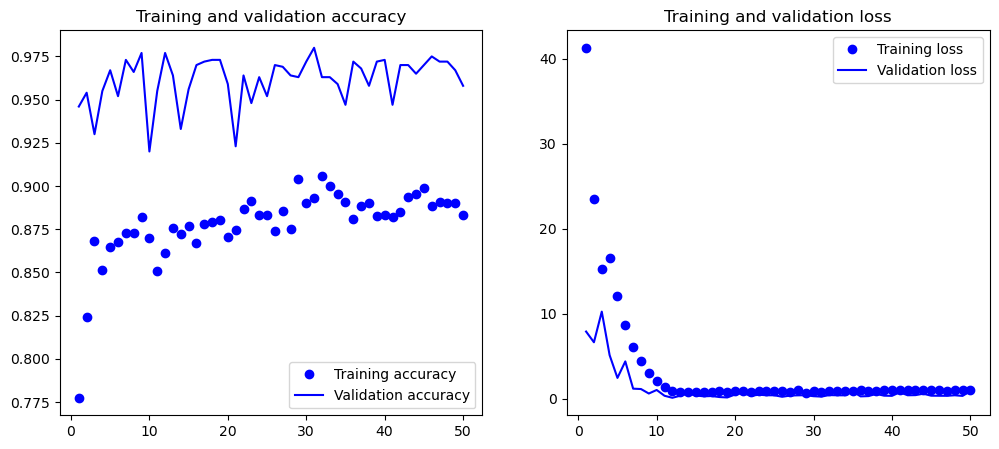

In [ ]:
# Visualisoidaan koulutus- ja validointitulokset
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].plot(epochs, accuracy, "bo", label="Training accuracy")
axes[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
axes[0].set_title("Training and validation accuracy")
axes[0].legend()


axes[1].plot(epochs, loss, "bo", label="Training loss")
axes[1].plot(epochs, val_loss, "b", label="Validation loss")
axes[1].set_title("Training and validation loss")
axes[1].legend()

### Johtopäätökset:
Ennakkokoulutetun mallin ja datan rikastamisen avulla saavutimme mallin erittäin korkean suorituskyvyn. Validointiaineiston tarkkuus saavutti 90 %, ja häviöt sekä koulutusaineistossa että validointiaineistossa lähestyvät nollaa.

## 5. Arviointi

1. Ennakkokoulutetun VGG16-mallin käyttö tuottaa huomattavasti parempia tuloksia verrattuna perus-CNN:ään. VGG16:n avulla, joka on oppinut ImageNetissä, voidaan tehokkaasti tunnistaa visuaalisia piirteitä ja näin nopeuttaa uuden tehtävän omaksumista.

2. Datan rikastaminen parantaa mallin tarkkuutta lisäämällä syötteiden monimuotoisuutta, mikä auttaa vähentämään ylioppimista ja parantamaan yleistettävyyttä.

3. Parametrien jähmettäminen ennakkokoulutetussa mallissa säilyttää jo opitut piirteet, jolloin voidaan keskittyä uusien kerrosten kouluttamiseen. Tämä mahdollistaa resurssien tehokkaamman käytön ja estää hyödyllisten piirteiden tuhoutumisen.


## 6. Yhteenveto
1. **Miksi siirto-oppiminen auttaa?**  
   Siirto-oppiminen auttaa, koska se hyödyntää mallia, joka on jo oppinut erilaisia piirteitä laajasta ja monipuolisesta datasetistä, kuten ImageNet. Tämä mahdollistaa nopeamman ja tehokkaamman oppimisprosessin, kun malli pystyy soveltamaan aiemmin opittuja piirteitä uuteen tehtävään pienemmällä määrällä kohdedataa.

2. **Miten data-augmentaatio vaikuttaa tuloksiin?**  
   Data-augmentaatio parantaa tuloksia lisäämällä treenaamisdatan monimuotoisuutta. Se luo uusia variaatioita olemassa olevista kuvista esimerkiksi kiertämällä, skaalaamalla ja kääntämällä niitä, mikä tekee mallista kestävämmän ja sillä on parempi yleistämiskyky. Tämä auttaa vähentämään ylioppimista ja parantaa mallin suorituskykyä erilaisissa olosuhteissa.

3. **Mitkä olivat suurimmat haasteet?**  
   Rakennettaessa ja kouluttaessa malleja kohdataan usein ongelmia, kuten ylioppiminen ja datan puute. Tässä työssä opimme käsittelemään näitä ongelmia hyödyntämällä ennakkokoulutettuja malleja ja datan rikastamista.

4. **Mitä kokeilisit seuraavaksi parantaaksesi suorituskykyä?**  
   Seuraavaksi kokeilisin erilaisten hyperparametrien säätämistä ja eri arkkitehtuurien testaamista mallin optimaalisen suorituskyvyn saavuttamiseksi. Voisin myös tutkia lisää data-augmentaatiotekniikoita ja niiden yhdistelmiä, samoin kuin kokeilla muiden ennakkokoulutettujen mallien, kuten ResNet tai Inception, käyttöä. Lisäksi lisäisin ehkä myös dropoutin tai muita säännöllistämismenetelmiä parantaakseni vielä mallin yleistämiskykyä.